In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

navy_revenue_monthly = pd.read_csv('drive/MyDrive/DS701/Navy Revenue Report FY20-FY24-2/monthly_summary_final.csv')

## Average Slot Revenue per Installation by Country (FY18–FY24)

/tmp/ipython-input-960017259.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


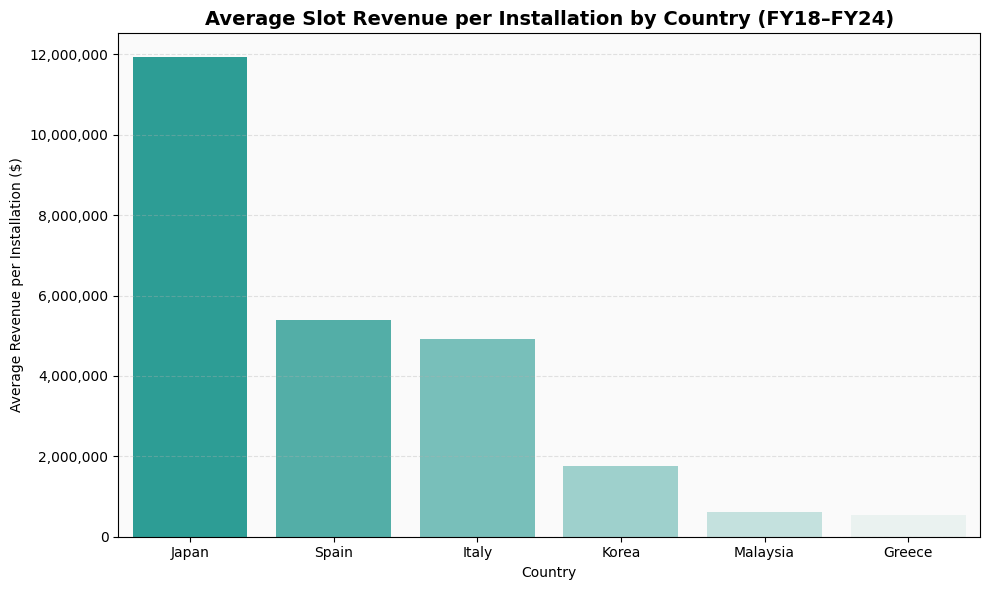

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# calcualte FY18–FY24 revenue
fy_cols = [c for c in navy_revenue_reimbursement.columns if c.startswith("FY") and "thru" not in c]
navy_revenue_reimbursement[fy_cols] = navy_revenue_reimbursement[fy_cols].apply(pd.to_numeric, errors="coerce")

# total installation revenue
navy_revenue_reimbursement["Total_Installation_Revenue"] = navy_revenue_reimbursement[fy_cols].sum(axis=1)

# avg revenue in each country per installation
country_avg = (
    navy_revenue_reimbursement.groupby("Country")["Total_Installation_Revenue"]
    .mean()
    .reset_index(name="Avg_Revenue_per_Installation")
)

# sorted by abg revenue
country_avg = country_avg.sort_values("Avg_Revenue_per_Installation", ascending=False)


muckrock_palette = sns.light_palette("#1AB0A5", n_colors=len(country_avg), reverse=True)

# bar chart
plt.figure(figsize=(10, 6))
sns.barplot(
    data=country_avg,
    x="Country",
    y="Avg_Revenue_per_Installation",
    palette=muckrock_palette
)
plt.title("Average Slot Revenue per Installation by Country (FY18–FY24)", fontsize=14, fontweight="bold")
plt.xlabel("Country")
plt.ylabel("Average Revenue per Installation ($)")
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{int(x):,}"))
plt.grid(axis='y', linestyle='--', alpha=0.35)
plt.gca().set_facecolor("#FAFAFA")
plt.tight_layout()
plt.show()


## Slot Machine Revenue by Installation (FY18–FY24)

/tmp/ipython-input-4089939846.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  slot_navy_revenue_reimbursement[col] = pd.to_numeric(


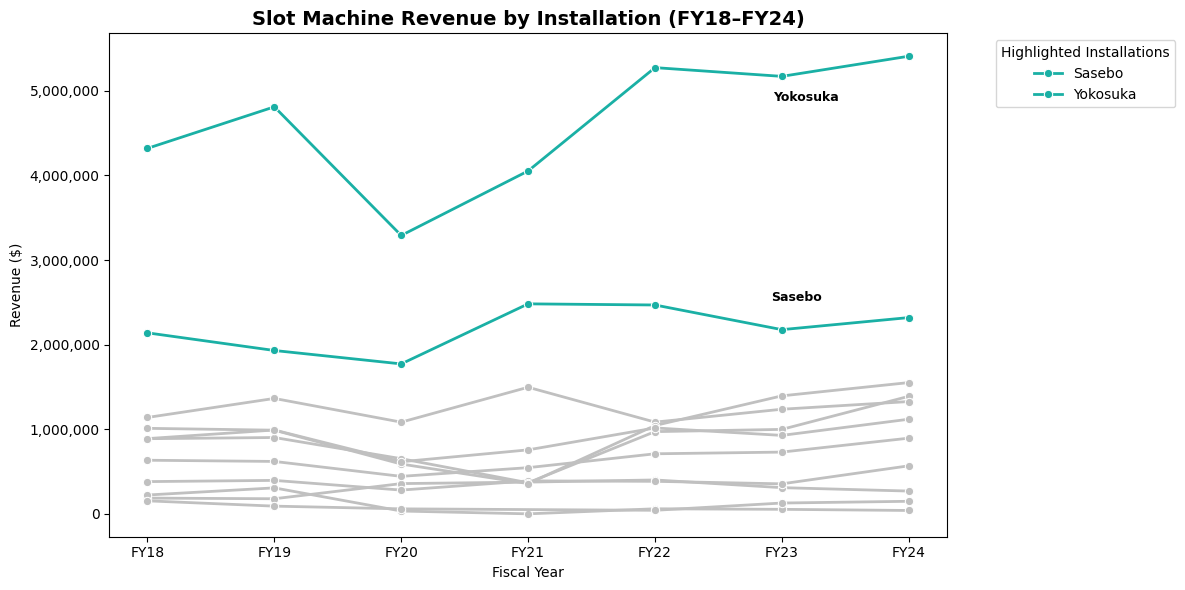

In [ ]:
import matplotlib.ticker as mticker
import seaborn as sns
import matplotlib.pyplot as plt

# clean and filter
navy_revenue_reimbursement.columns = navy_revenue_reimbursement.columns.str.strip()
slot_navy_revenue_reimbursement = navy_revenue_reimbursement[
    navy_revenue_reimbursement["Category"] == "Slot Revenue"
]

# convert data type to numeric
fy_cols = [c for c in navy_revenue_reimbursement.columns if c.startswith("FY")]
for col in fy_cols:
    if col in slot_navy_revenue_reimbursement.columns:
        slot_navy_revenue_reimbursement[col] = pd.to_numeric(
            slot_navy_revenue_reimbursement[col], errors="coerce"
        )


slot_long = slot_navy_revenue_reimbursement.melt(
    id_vars=["Country", "Installation"],
    value_vars=fy_cols,
    var_name="Fiscal_Year",
    value_name="Revenue",
)

# focus on the two high installation
targets = ["Yokosuka", "Sasebo"]

# customize the color
palette = {
    inst: "#1AB0A5" if inst in targets else "#C0C0C0"
    for inst in slot_long["Installation"].unique()
}


plt.figure(figsize=(12, 6))
sns.lineplot(
    data=slot_long,
    x="Fiscal_Year",
    y="Revenue",
    hue="Installation",
    palette=palette,
    linewidth=2,
    marker="o"
)


plt.title("Slot Machine Revenue by Installation (FY18–FY24)", fontsize=14, fontweight="bold")
plt.xlabel("Fiscal Year")
plt.ylabel("Revenue ($)")
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{int(x):,}"))


handles, labels = plt.gca().get_legend_handles_labels()
keep = [i for i, l in enumerate(labels) if l in targets]
plt.legend(
    [handles[i] for i in keep],
    [labels[i] for i in keep],
    title="Highlighted Installations",
    bbox_to_anchor=(1.05, 1),
    loc="upper left"
)

# customize the annotation posistion
custom_positions = {
    "Yokosuka": (-50, -25),
    "Sasebo":   (175, 0),
}


ax = plt.gca()
tops = (
    slot_long.dropna(subset=["Revenue"])
             .loc[slot_long["Installation"].isin(targets)]
             .sort_values("Revenue", ascending=False)
             .groupby("Installation", as_index=False)
             .head(1)
)

for _, row in tops.iterrows():
    x, y, label = row["Fiscal_Year"], row["Revenue"], row["Installation"]
    xytext = custom_positions.get(label, (6, 6))
    ha = "right" if xytext[0] < 0 else "left"
    va = "top"   if xytext[1] < 0 else "bottom"

    ax.annotate(
        label,
        xy=(x, y),
        xytext=xytext,
        textcoords="offset points",
        ha=ha, va=va,
        fontsize=9, fontweight="bold",
        bbox=dict(boxstyle="round,pad=0.2", fc="white", ec="none", alpha=0.7)
    )

plt.tight_layout()
plt.show()